In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import hwplatform as hw
import ipywidgets as widgets
from IPython.display import display, HTML

In [3]:
port = hw.openSerialPort(auto_open=True, default_port="three")

In [4]:
print(f"Port is open: {port.is_open}")

Port is open: True


In [5]:
def readRegister(addr):
    port.writeln(f"r {addr}")
    result = int(port.readln())
    
    return result

def writeRegister(addr, value):
    port.writeln(f"w {addr} {value}")
    result = int(port.readln())
    return result == 0

In [6]:
writeRegister(1, 666)

True

In [7]:
readRegister(1)

666

In [8]:
machine = hw.RegisterMachine(readRegister, writeRegister)

In [9]:
machine.write(123, 333)
machine.read(1)

666

In [10]:
machine.writeBytes(5, 'hello'.encode('ascii'), auto_increment=True)
bytes(machine.readBytes(5, 5, auto_increment=True)).decode('ascii')

'hello'

In [11]:
hw.registerReader(machine)

In [15]:
hw.registerWriter(machine)

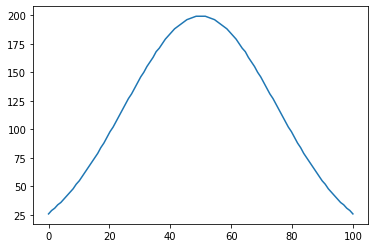

In [16]:
data = machine.readBytes(201, 100, auto_increment=True)
hw.plot(data)

In [14]:
#hw.serialMonitor(port)